In [1]:
import energyflow as ef
import numpy as np
import time
#import numpy as np
import matplotlib.pyplot as plt
import glob
import pickle
import pandas as pd
#import grinpy as gp
import grinpy as gp
import networkx as nx
from grinpy.invariants.chromatic import chromatic_number_ilp

In [7]:
!pip install energyflow --user


In [3]:
events = ef.gen_massless_phase_space(nevents=10, nparticles=30, energy=100)

In [2]:
efpset = ef.EFPSet(('d<=',7),('p==',1), measure='hadr', beta=1, kappa = 1,normed=True, verbose=True)

Originally Available EFPs:
  Prime: 23691
  Composite: 21540
  Total:  45231
Current Stored EFPs:
  Prime: 490
  Composite: 0
  Total:  490


In [21]:
efpset = ef.EFPSet(('d==',8),('p==',1),('c==',5), measure='hadr', beta=1, kappa = 1,normed=True, verbose=True)

Originally Available EFPs:
  Prime: 23691
  Composite: 21540
  Total:  45231
Current Stored EFPs:
  Prime: 1
  Composite: 0
  Total:  1


In [22]:
748+19+415+1

1183

In [13]:
start_time = time.time()
results = np.asarray([efpset.compute(events[event]) for event in range(len(events))])
print(results.shape)
end_time = time.time()

print(end_time-start_time)

(10, 490)
1.3216776847839355


In [19]:
15*1.34

20.1

In [7]:
efpset = ef.EFPSet(('d==',5), ('p==',1),('n==',5),('v==',3),('e==',4),('h==',1), measure='hadr', beta=0.5, kappa = 2,normed=True, verbose=True)

efpset = ef.EFPSet(('d==',4), ('p==',1),('n==',2),('v==',4),('e==',1),('h==',0), measure='hadr', beta=2, kappa = 0,normed=True, verbose=True)

efpset = ef.EFPSet(('d==',0), ('p==',1),('n==',1),('e==',0), measure='hadr', kappa = 0,normed=True, verbose=True)

efpset = ef.EFPSet(('d==',0), ('p==',1),('n==',1),('e==',0), measure='hadr', kappa = -1,normed=True, verbose=True)

efpset = ef.EFPSet(('d==',7), ('p==',1),('n==',8),('v==',7),('e==',7),('h==',7), measure='hadr',kappa =1,beta=0.5,normed=True, verbose=True)

efpset = ef.EFPSet(('d==',6), ('p==',1),('n==',4),('v==',3),('e==',4),('h==',0), measure='hadr',kappa =1,beta=0.5,normed=True, verbose=True)

efpset = ef.EFPSet(('d==',5), ('p==',1),('n==',6),('v==',5),('e==',5),('h==',5), measure='hadr',kappa =-1,beta=0.5,normed=True, verbose=True)

Originally Available EFPs:
  Prime: 23691
  Composite: 21540
  Total:  45231
Current Stored EFPs:
  Prime: 1
  Composite: 0
  Total:  1


In [38]:
170-54*3

8

In [21]:
efpset = ef.EFPSet(('d<=',5), ('p==',1), measure='hadr', beta=0.5, kappa = 2,normed=True, verbose=True)


Originally Available EFPs:
  Prime: 23691
  Composite: 21540
  Total:  45231
Current Stored EFPs:
  Prime: 54
  Composite: 0
  Total:  54


In [193]:
efpset = ef.EFPSet(('d==',9), ('p==',1), measure='hadr', beta=0.5, kappa = 2,normed=True, verbose=True)


Originally Available EFPs:
  Prime: 23691
  Composite: 21540
  Total:  45231
Current Stored EFPs:
  Prime: 4442
  Composite: 0
  Total:  4442


In [8]:
graphset_d7=[]
for i in range(490):
   # if i in d8_c4:
        graph = efpset.graphs(i)
        graph1 = graph
    
        graphset_d7.append(graph1)
        
graphset_d7 = np.asarray(graphset_d7)          

In [47]:
efpset = ef.EFPSet('d<=7','p==1', measure='hadr', beta=1, normed=True, verbose=True)
chromatic_number = []
for i in range(490):
    graph = efpset.graphs(i)
    G=nx.MultiGraph()
    G.add_edges_from(graph)
    c = chromatic_number_ilp(G)
    chromatic_number.append(c)

Originally Available EFPs:
  Prime: 23691
  Composite: 21540
  Total:  45231
Current Stored EFPs:
  Prime: 490
  Composite: 0
  Total:  490


In [96]:
chrom = np.array(chromatic_number)
len(np.argwhere(chrom==4))

45

In [97]:
chrom = np.array(chromatic_200)
len(np.argwhere(chrom==4))

2

In [98]:
np.argwhere(chrom==4)

array([[59],
       [95]])

In [3]:
betas=[0.5,1,2]
kappas=[-1,0,0.5,1,2]

index1=[]
chromatic_number = []
n_list = []
d_list = []
e_list = []
v_list = []
h_list = []
beta_list = []
kappa_list = []

m = 0
for beta in betas:
    for kappa in kappas:
        efpset = ef.EFPSet(('d<=',7), ('p==',1), measure='hadr', beta=beta, kappa = kappa,normed=True, verbose=False)
        for i in range(490):
            index1.append(m)
            m=m+1
          #  print(beta_list)
            graph = efpset.graphs(i)
            n, e, d, v, _, _, _, h = efpset.specs[i]

            G=nx.MultiGraph()
            G.add_edges_from(graph)
            c = chromatic_number_ilp(G)
            
            chromatic_number.append(c)
            kappa_list.append(kappa)
            beta_list.append(beta)
            n_list.append(n)
            e_list.append(e)
            d_list.append(d)
            v_list.append(v)
            h_list.append(h)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/ranit/.local/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/xf/pnhz_ldd7v339lr7d87r94h00000gn/T/dd33ba2f578a4cdf8bc3e3fef7b5720f-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/xf/pnhz_ldd7v339lr7d87r94h00000gn/T/dd33ba2f578a4cdf8bc3e3fef7b5720f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 5 COLUMNS
At line 7 RHS
At line 8 BOUNDS
At line 10 ENDATA
Problem MODEL has 0 rows, 1 columns and 0 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Empty problem - 0 rows, 1 columns and 0 elements
Optimal - objective value 0
Optimal objective 0 - 0 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.01

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

KeyboardInterrupt: 

In [5]:
chromatic_no = np.array(chromatic_number)
kappa_list = np.array(kappa_list)
beta_list = np.array(beta_list)
n_list = np.array(n_list)
e_list = np.array(e_list)
d_list = np.array(d_list)
v_list = np.array(v_list)
h_list = np.array(h_list)

In [44]:
efp1 = np.where((kappa_list==2) & (beta_list==1/2) & (n_list==5) & (d_list==5) & (e_list==4) & (v_list==3) & (h_list==1))[0]

In [7]:
variables_ypred_03_07=[4436, 4491, 3407, 1500, 4303, 2063, 733, 4395, 2197, 2059, 4026]

In [8]:
chromatic_no[variables_ypred_03_07]

array([3, 3, 2, 3, 3, 3, 2, 2, 4, 3, 4])

In [40]:
kappa_list[variables_ypred_03_07]

array([2., 2., 0., 1., 1., 2., 0., 1., 2., 2., 1.])

In [41]:
beta_list[variables_ypred_03_07]

array([1. , 1. , 1. , 0.5, 1. , 0.5, 0.5, 1. , 0.5, 0.5, 1. ])

In [13]:
4395-490*8,2197-490*4,2059-490*4,4026-490*8

106

In [24]:
np.arange(15,0,-1)

array([15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [26]:
graph_index=[]
for v in variables_ypred_03_07:
    for i in np.arange(15,0,-1):
        graph_v = v-490*i
        if graph_v>0:
            graph_index.append(graph_v)
            break

In [27]:
graph_index

[26, 81, 467, 30, 383, 103, 243, 475, 237, 99, 106]

In [163]:
efp2 = np.where((kappa_list==0) & (beta_list==2) & (n_list==2) & (d_list==4) & (e_list==1) & (v_list==4) & (h_list==0))[0]

In [170]:
efp2-490*11

array([4])

In [174]:
efp3 = np.where((kappa_list==0) & (beta_list==0.5) & (n_list==1) & (d_list==0) & (e_list==0) & (v_list==0) & (h_list==0))[0]

In [181]:
efp5 = np.where((kappa_list==-1) & (beta_list==0.5) & (n_list==1) & (d_list==0) & (e_list==0) & (v_list==0) & (h_list==0))[0]

In [182]:
efp4 = np.where((kappa_list==1) & (beta_list==0.5) & (n_list==8) & (d_list==7) & (e_list==7) & (v_list==7) & (h_list==7))[0]

In [187]:
efp6 = np.where((kappa_list==1) & (beta_list==0.5) & (n_list==4) & (d_list==6) & (e_list==6) & (v_list==3) & (h_list==0))[0]

In [192]:
efp7=np.where((kappa_list==-1) & (beta_list==0.5) & (n_list==6) & (d_list==5) & (e_list==5) & (v_list==5) & (h_list==5))[0]

In [197]:
variables=[efp1.item(),efp2.item(),efp3.item(),efp4.item(),efp5.item(),efp6.item(),efp7.item()]

In [199]:
variables_paper=[2100, 5394, 490, 1937, 0, 1576, 241]

In [30]:
graph_index

[26, 81, 467, 30, 383, 103, 243, 475, 237, 99, 106]

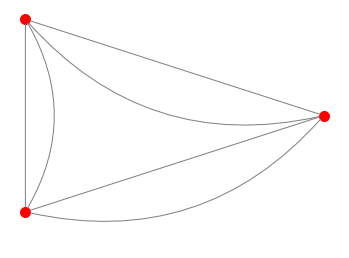

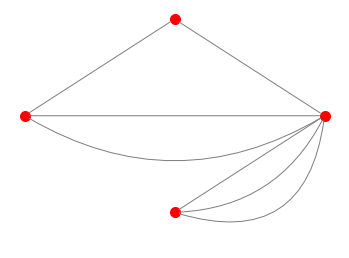

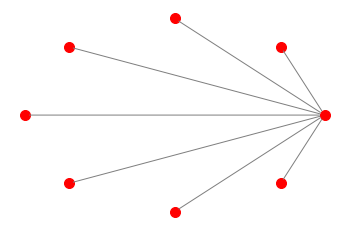

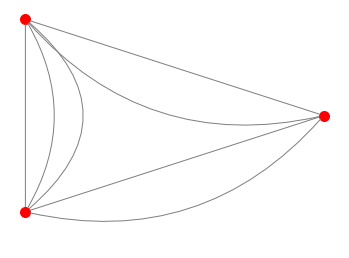

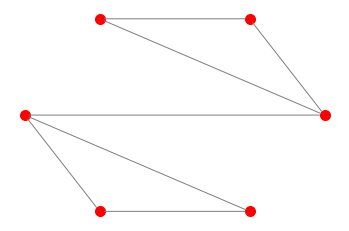

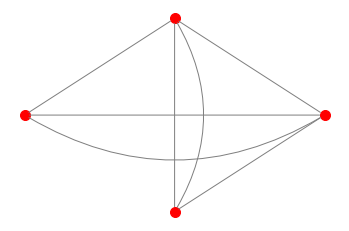

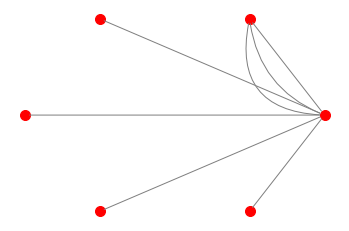

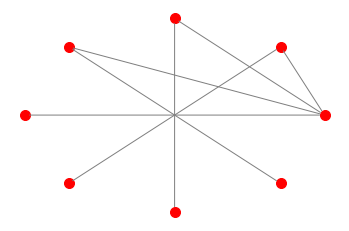

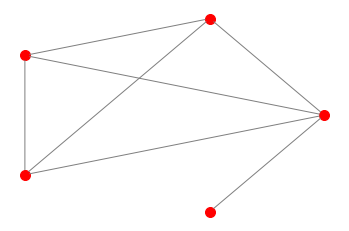

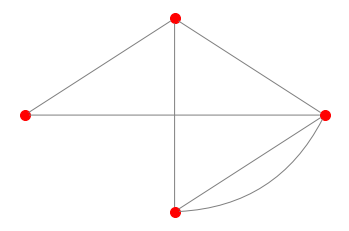

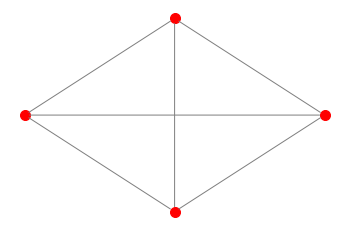

In [39]:
for index in graph_index:
    graph = efpset.graphs(int(index))
    G=nx.MultiGraph(graph)
    pos = nx.shell_layout(G)
    nx.draw_networkx_nodes(G, pos, node_color = 'r', node_size = 100, alpha = 1)
    ax = plt.gca()
    for e in G.edges:
        ax.annotate("",
                    xy=pos[e[0]], xycoords='data',
                    xytext=pos[e[1]], textcoords='data',
                    arrowprops=dict(arrowstyle="-", color="0.5",
                                    shrinkA=5, shrinkB=5, dpi_cor=10,
                                    patchA=None, patchB=None,
                                    connectionstyle="arc3,rad=rrr".replace('rrr',str(0.3*e[2])
                                    ),
                                    ),
                    )
    plt.save()
    plt.axis('off')
    plt.show()

graph= [(1, 2), (2, 3)]

In [160]:
#graph = [(0,1),(1,0)]


In [35]:
np.array([2069, 2076, 2077, 2078, 2100, 2101, 2159])-490*4

array([109, 116, 117, 118, 140, 141, 199])

In [61]:
variables = [471, 5797, 5387, 4001, 903, 944, 4502, 1518, 2319, 4297, 4789, 1559, 4247, 821, 3304, 3919, 5939, 3468, 2771, 3510, 4975, 488, 5652, 2196, 1212, 1602, 5655, 6265, 3389, 1232, 4856, 6091, 2507, 5869, 2413, 1674, 4135, 1600, 781, 4331, 533, 3155, 5575, 3960, 3452, 1520, 2171, 5454, 5838, 6546, 2532, 985, 718, 2896, 5110, 2250, 4774, 1006, 5756, 3047, 2664, 3056, 5724, 3725, 5923, 3173, 6581, 1301, 3267, 3588, 228, 2418, 4932, 5902, 6521, 680, 2101, 6357, 1002, 7293, 6996, 2596, 3499, 5067, 86, 3560, 7001, 7298, 1008, 2584, 2601, 465, 3964, 4558, 5553, 3536, 2910, 2671, 6557, 165, 5993, 1263, 1546, 5896, 222, 3544, 6692, 999, 5899, 3060, 3511, 3375, 4454, 6276, 7323, 4595, 1959, 48, 3308, 5493, 7289, 2898, 4560, 3858, 3105, 3945, 3700, 2591, 3145, 1189, 4447, 163, 6322, 7142, 3573, 3037, 6105, 3218, 5424, 1136, 2559, 4172, 5823, 1181, 4543, 5356, 1720, 5875, 1422, 194, 1134, 2182, 2001, 1278, 2801, 3271, 355, 1092, 1578, 4672, 2841, 6409, 4379, 6007, 40, 4857, 6572, 3792, 1719, 79, 256, 3794, 6689, 2071, 6452, 6225, 2025, 1638, 364, 6693, 6524, 6234, 3276, 1474, 94, 4223, 5286, 6274, 2844, 1174, 1047, 3215, 6617, 4044, 2957, 5674, 1436, 2427, 307, 1860]

In [20]:
len(chromatic_number)

7352

In [64]:
chromatic_200 = np.asarray(chromatic_number)[variables].tolist()
n_list_200 = np.asarray(n_list)[variables].tolist()
d_list_200 = np.asarray(d_list)[variables].tolist()
beta_list_200 = np.asarray(beta_list)[variables].tolist()
kappa_list_200 = np.asarray(kappa_list)[variables].tolist()

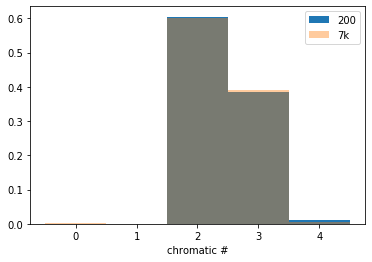

In [108]:
data = np.array(chromatic_200)
d = np.diff(np.unique(data)).min()
left_of_first_bin = data.min() - float(d)/2
right_of_last_bin = data.max() + float(d)/2

data1 = np.array(chromatic_number)
d1 = np.diff(np.unique(data1)).min()
left_of_first_bin1 = data1.min() - float(d1)/2
right_of_last_bin1 = data1.max() + float(d1)/2

plt.hist(data, np.arange(left_of_first_bin, right_of_last_bin + d, d),density=True,label='200')
plt.hist(data1, np.arange(left_of_first_bin1, right_of_last_bin1 + d1, d1),density=True,label='7k',alpha=0.4)
plt.xlabel('chromatic #')
plt.xticks(np.arange(0,5,1))
plt.legend()
plt.show()

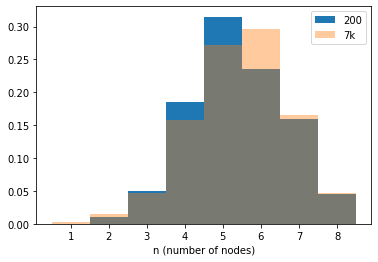

In [113]:
#bins = np.arange(0, 10, 1)
data = np.array(n_list_200)
d = np.diff(np.unique(data)).min()
left_of_first_bin = data.min() - float(d)/2
right_of_last_bin = data.max() + float(d)/2

data1 = np.array(n_list)
d1 = np.diff(np.unique(data1)).min()
left_of_first_bin1 = data1.min() - float(d1)/2
right_of_last_bin1 = data1.max() + float(d1)/2

plt.hist(data, np.arange(left_of_first_bin, right_of_last_bin + d, d),density=True,label='200')
plt.hist(data1, np.arange(left_of_first_bin1, right_of_last_bin1 + d1, d1),density=True,label='7k',alpha=0.4)
plt.legend()
plt.xlabel('n (number of nodes)')

plt.show()

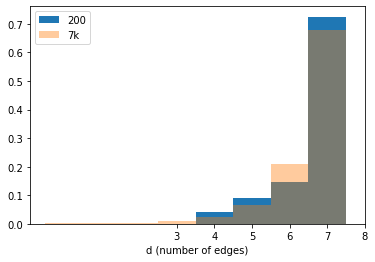

In [114]:
data = np.array(d_list_200)
d = np.diff(np.unique(data)).min()
left_of_first_bin = data.min() - float(d)/2
right_of_last_bin = data.max() + float(d)/2

data1 = np.array(d_list)
d1 = np.diff(np.unique(data1)).min()
left_of_first_bin1 = data1.min() - float(d1)/2
right_of_last_bin1 = data1.max() + float(d1)/2

plt.hist(data, np.arange(left_of_first_bin, right_of_last_bin + d, d),density=True,label='200')
plt.hist(data1, np.arange(left_of_first_bin1, right_of_last_bin1 + d1, d1),density=True,label='7k',alpha=0.4)
plt.legend()
plt.xlabel('d (number of edges)')
plt.xticks(np.arange(3,9,1))
plt.show()

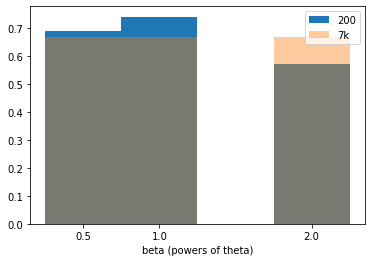

In [115]:
data = np.array(beta_list_200)
d = np.diff(np.unique(data)).min()
left_of_first_bin = data.min() - float(d)/2
right_of_last_bin = data.max() + float(d)/2

data1 = np.array(beta_list)
d1 = np.diff(np.unique(data1)).min()
left_of_first_bin1 = data1.min() - float(d1)/2
right_of_last_bin1 = data1.max() + float(d1)/2

plt.hist(data, np.arange(left_of_first_bin, right_of_last_bin + d, d),density=True,label='200')
plt.hist(data1, np.arange(left_of_first_bin1, right_of_last_bin1 + d1, d1),density=True,label='7k',alpha=0.4)
plt.legend()
plt.xlabel('beta (powers of theta)')
plt.xticks(np.array(betas))
plt.show()

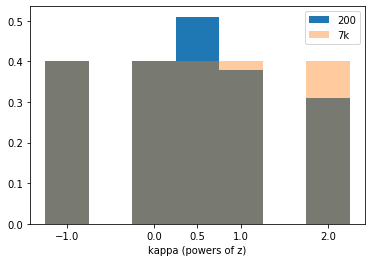

In [116]:
data = np.array(kappa_list_200)
d = np.diff(np.unique(data)).min()
left_of_first_bin = data.min() - float(d)/2
right_of_last_bin = data.max() + float(d)/2

data1 = np.array(kappa_list)
d1 = np.diff(np.unique(data1)).min()
left_of_first_bin1 = data1.min() - float(d1)/2
right_of_last_bin1 = data1.max() + float(d1)/2

plt.hist(data, np.arange(left_of_first_bin, right_of_last_bin + d, d),density=True,label='200')
plt.hist(data1, np.arange(left_of_first_bin1, right_of_last_bin1 + d1, d1),density=True,label='7k',alpha=0.4)
plt.legend()
plt.xlabel('kappa (powers of z)')
plt.xticks(np.array(kappas))
plt.show()

In [16]:
G = gp.petersen_graph()

In [17]:
G

In [226]:
graphset_d9=[]
for i in range(4442):
    if i in d9_c4:
        graph = efpset.graphs(i)
        graph1 = graph.tolist()
    
        graphset_d9.append(graph1)

graphset_d9 = np.asarray(graphset_d9)        

In [219]:
graphset_d8.append(np.asarray(graphset_d9).flatten().tolist())

In [229]:
all_graphset = np.vstack((graphset_d8,graphset_d9)).tolist()

In [10]:
d8_c4 = np.asarray([69, 70, 71, 251, 252, 253, 263, 591, 592, 593])-1
d8_c4_indices = np.asarray(indices)[d8_c4.tolist()]

NameError: name 'indices' is not defined

In [14]:
len(d8_c4)

10

In [86]:
#for i in d8_c4_indices:
 #   ef.EFPSet(('d==',i[1]), ('n==',i[0]),('k==',i[2]), measure='hadr', beta=0.5, kappa = 2,normed=True, verbose=False)

In [99]:
d9_c4 = np.asarray([102, 103, 104, 105, 106, 107, 455, 456, 457, 458, 459, 460, 461, 462, 463, 497, 498, 499, 500, 503, 1351, 1352, 1353, 1354, 1355, 
1356, 1357, 1358, 1359, 1360, 1361, 1453, 1454, 1455, 1458, 1459, 2684, 2685, 2686, 2687, 2688, 2689, 2690])-1
d9_c4_indices = np.asarray(indices1)[d9_c4.tolist()]

In [104]:
all_indices= np.vstack((d8_c4_indices,d9_c4_indices)).tolist()

In [231]:
efpset = ef.EFPSet(np.asarray(all_graphset),measure='hadr',beta=1,kappa=1,normed=True,verbose=True)

TypeError: unhashable type: 'numpy.ndarray'

In [92]:
all_indices = d8_c4_indices.append(d9_c4_indices)

In [125]:
kappas = [-1,0,0.5,1,2]
betas = [0.5,1,2]


allefpset=[]
start = time.time()
for event in range(len(events)):
    efp_array=[]
    for beta in betas:
      #  for kappa in kappas:
        print(beta)
        efp_temp = [[[ef.EFPSet(('n==',i[0]), ('d==',i[1]),
                               ('k==',i[2]),('p==',1),measure='hadr',beta=beta,kappa=kappa,
                               normed=True,verbose=False).compute(events[event])
                     for i in all_indices] 
                    for kappa in kappas]
                   for beta in betas]
        efp_array.append(efp_temp)
            #for i in all_indices:
                #efpset=ef.EFPSet(('d==',i[1]), ('n==',i[0]),('k==',i[2]),('p==',1),measure='hadr',beta=beta,kappa=kappa,normed=True,verbose=False)
                #results=efpset.compute(events[event])
                #efp_array.append(results)
    
    allefpset.append(np.asarray(efp_array).flatten().tolist())
end = time.time()

print(end-start)

0.5
1
2
0.5
1
2
167.84286332130432


In [118]:
np.asarray(allefpset).shape

(2, 636)

In [148]:
bk = [[beta,kappa,par[0],par[1],par[2]] for beta in betas for kappa in kappas for par in all_indices]

In [158]:
bk = np.asarray(bk)

array([[ 5.000e-01, -1.000e+00,  4.000e+00,  8.000e+00,  5.800e+01],
       [ 5.000e-01, -1.000e+00,  4.000e+00,  8.000e+00,  5.900e+01],
       [ 5.000e-01, -1.000e+00,  4.000e+00,  8.000e+00,  6.000e+01],
       ...,
       [ 2.000e+00,  2.000e+00,  7.000e+00,  9.000e+00,  1.215e+03],
       [ 2.000e+00,  2.000e+00,  7.000e+00,  9.000e+00,  1.216e+03],
       [ 2.000e+00,  2.000e+00,  7.000e+00,  9.000e+00,  1.217e+03]])

In [156]:
start = time.time()

all_efp = [[ef.EFPSet(('n==',param[2]), ('d==',param[3]),
                               ('k==',param[4]),('p==',1),measure='hadr',beta=param[0],kappa=param[2],
                               normed=True,verbose=False).compute(event) for event in events] 
           for param in bk]

end = time.time()

print(end-start)

168.82366490364075


In [234]:
start = time.time()
#event = events[0]
#all_efp =lambda n,d,k,beta,kappa:ef.EFPSet(('n==',int(n)), ('d==',int(d)),
 #                              ('k==',int(k)),('p==',int(1)),measure='hadr',
  #                          beta=beta,kappa=kappa,normed=True,verbose=False).compute(event),
   #           bk[:,2],bk[:,3],bk[:,4],bk[:,0],bk[:,1]

#list(all_efp)
all_efp = []

for n,d,k,beta,kappa in zip(bk[:,2],bk[:,3],bk[:,4],bk[:,0],bk[:,1]):
    efpset = ef.EFPSet(('n==',int(n)), ('d==',int(d)),('k==',int(k)),
                       ('p==',int(1)),measure='hadr',beta=beta,kappa=kappa,normed=True,verbose=False)
    #efps = efpset.batch_compute(events)
    efps = np.asarray([efpset.compute(event) for event in events]).flatten() 
    #print(np.asarray(efps).shape)        
 #   all_efp.append(efps)
    
#print(np.asarray(all_efp).shape)    

#all_efp = [[ef.EFPSet(('n==',param[2]), ('d==',param[3]),
 #                              ('k==',param[4]),('p==',1),measure='hadr',beta=param[0],kappa=param[2],
  #                             normed=True,verbose=False).compute(event) for event in events] 
   #        for param in bk]

end = time.time()

print(end-start)

190.1106903553009


In [233]:
481.65/60

8.0275

In [182]:
np.transpose(np.asarray(all_efp)).shape

(10, 795)

In [176]:
#efpset = ef.EFPSet(('d==',9), ('p==',1), measure='hadr', beta=0.5, kappa = 2,normed=True, verbose=True)
53*15

795

In [68]:
graphset1=[]
for i in range(4442):
    graph = efpset.graphs(i)+1
    graph1 = graph.tolist()
    
    graphset1.append(graph1)

In [21]:
indices_d8 = []
for i in range(1183):
    n, _, d, _, k,_, _, _= efpset.specs[i]
    indices.append([n,d,k])

In [69]:
indices1 = []
for i in range(4442):
    n, _, d, _, k,_, _, _= efpset.specs[i]
    indices1.append([n,d,k])

In [53]:
str(graphset[0].tolist())

'[[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]'

In [52]:
output_file = open('graph.txt', 'w')

for i in graphset:
    output_file.write(i.tolist())

output_file.close()


#for i in graphset:
 #   i.tolist()
  #  with 
    

TypeError: write() argument must be str, not list

In [71]:
print(str(graphset1))

[[[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]], [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 3]], [[1, 2], [1, 2], [1, 3], [1, 3], [1, 3], [1, 3], [1, 3], [1, 3], [1, 3]], [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 3], [1, 3], [1, 3]], [[1, 2], [1, 2], [1, 2], [1, 2], [1, 3], [1, 3], [1, 3], [1, 3], [1, 3]], [[1, 2], [1, 3], [1, 3], [1, 3], [1, 3], [1, 3], [1, 3], [1, 3], [2, 3]], [[1, 2], [1, 3], [1, 3], [1, 3], [1, 3], [1, 3], [1, 3], [2, 3], [2, 3]], [[1, 2], [1, 2], [1, 2], [1, 3], [1, 3], [1, 3], [1, 3], [1, 3], [2, 3]], [[1, 2], [1, 3], [1, 3], [1, 3], [1, 3], [2, 3], [2, 3], [2, 3], [2, 3]], [[1, 2], [1, 2], [1, 3], [1, 3], [1, 3], [1, 3], [1, 3], [2, 3], [2, 3]], [[1, 2], [1, 2], [1, 3], [1, 3], [1, 3], [1, 3], [2, 3], [2, 3], [2, 3]], [[1, 2], [1, 2], [1, 2], [1, 3], [1, 3], [1, 3], [2, 3], [2, 3], [2, 3]], [[1, 2], [1, 3], [1, 3], [1, 3], [1, 3], [1, 3], [1, 3], [1, 3], [1, 4]], [[1, 2], [1, 3], [1, 3], [1, 3], [1, 

In [45]:
ind = 28
graph = efpset.graphs(ind)
n, e, d, v, k,c, p, h = efpset.specs[ind]

print("Graph:", graph)
print("Number of vertices, n:", n)
print("Number of edges, e:", e)
print("Number of edges,    d:", d)
print("Maximum valency,    v:", v)
print("VE complexity,      c:", c)
print("Number of primes,   p:", p)
print("The value           k:", k)
print("Number of chads, h:", h)

Graph: [(0, 1), (0, 2), (1, 2), (1, 2), (0, 3)]
Number of vertices, n: 4
Number of edges, e: 4
Number of edges,    d: 5
Maximum valency,    v: 3
VE complexity,      c: 3
Number of primes,   p: 1
The value           k: 6
Number of chads, h: 1


In [31]:
ind = 0
graph = efpset.graphs(ind)
n, e, d, v, k, c, p, _ = efpset.specs[ind]

print("Graph:", graph)
print("Number of vertices, n:", n)
print("Number of simple edges,    e:", e)
print("Number of edges,    d:", d)
print("Maximum valency,    v:", v)
print("VE complexity,      c:", c)
print("Number of primes,   p:", p)
print("The value           k:", k)

Graph: [[0 1]]
Number of vertices, n: 2
Number of simple edges,    e: 1
Number of edges,    d: 1
Maximum valency,    v: 1
VE complexity,      c: 2
Number of primes,   p: 1
The value           k: 0


In [57]:
5+10+25+180+33*15+333*15+19*15+103*15+5

7545

In [14]:
1.04*1000*3.6/3600

1.04

In [17]:
start_time = time.time()
results = np.asarray([efpset.compute(event) for event in events1])
end_time = time.time()
(end_time - start_time)

0.07181811332702637

In [2]:
import pickle

with open("./data/jets2.txt", "rb") as fp:
    jets2 = pickle.load(fp)

In [16]:
efpset = ef.EFPSet(('d==',5), ('p==',1),('n==',6),('v==',5),('e==',5),('h==',5), measure='hadr',kappa =-1,beta=0.5,normed=True, verbose=True)

Originally Available EFPs:
  Prime: 23691
  Composite: 21540
  Total:  45231
Current Stored EFPs:
  Prime: 1
  Composite: 0
  Total:  1


In [3]:
all_vars = []
events = jets2
start = time.time()

efpset = ef.EFPSet(('n==',2), ('d==',3),('k==',0),('p==',1), measure='hadr', beta=1, kappa = 0.5,normed=True, verbose=True)
results = np.asarray([efpset.compute(events[event]) for event in range(len(events))])
   # print(results.flatten().tolist())
all_vars.append(results.flatten().tolist())
all_vars = np.transpose(np.asarray(all_vars))
#all_vars.shape
print(time.time() - start)
efpset = ef.EFPSet(('n==',4), ('d==',5),('k==',6),('p==',1), measure='hadr', beta=1, kappa = 1,normed=True, verbose=True)
results = np.asarray([efpset.compute(events[event]) for event in range(len(events))])
   # print(results.flatten().tolist())

all_vars = np.hstack((all_vars,results))
print(time.time() - start)
efpset = ef.EFPSet(('n==',5), ('d==',5),('k==',8),('p==',1), measure='hadr', kappa = 0.5, beta=0.5 ,normed=True, verbose=True)
results = np.asarray([efpset.compute(events[event]) for event in range(len(events))])
   # print(results.flatten().tolist())

all_vars = np.hstack((all_vars,results))
print(time.time() - start)



efpset = ef.EFPSet(('n==',2), ('d==',3),('k==',0),('p==',1), measure='hadr', kappa=1, beta=0.5, normed=True, verbose=True)
results = np.asarray([efpset.compute(events[event]) for event in range(len(events))])
   # print(results.flatten().tolist())

all_vars = np.hstack((all_vars,results))
print(time.time() - start)

efpset = ef.EFPSet(('n==',4), ('d==',4),('k==',0),('p==',1), measure='hadr',kappa =1,beta=1,normed=True, verbose=True)
results = np.asarray([efpset.compute(events[event]) for event in range(len(events))])
   # print(results.flatten().tolist())

all_vars = np.hstack((all_vars,results))
print(time.time() - start)

efpset = ef.EFPSet(('n==',5), ('d==',5),('k==',0),('p==',1), measure='hadr',kappa =1,beta=0.5,normed=True, verbose=True)
results = np.asarray([efpset.compute(events[event]) for event in range(len(events))])
   # print(results.flatten().tolist())

all_vars = np.hstack((all_vars,results))
print(time.time() - start)


np.asarray(all_vars).shape

Originally Available EFPs:
  Prime: 23691
  Composite: 21540
  Total:  45231
Current Stored EFPs:
  Prime: 1
  Composite: 0
  Total:  1
99.99945759773254
Originally Available EFPs:
  Prime: 23691
  Composite: 21540
  Total:  45231
Current Stored EFPs:
  Prime: 1
  Composite: 0
  Total:  1
204.2028524875641
Originally Available EFPs:
  Prime: 23691
  Composite: 21540
  Total:  45231
Current Stored EFPs:
  Prime: 1
  Composite: 0
  Total:  1
357.04458379745483
Originally Available EFPs:
  Prime: 23691
  Composite: 21540
  Total:  45231
Current Stored EFPs:
  Prime: 1
  Composite: 0
  Total:  1
493.74799132347107
Originally Available EFPs:
  Prime: 23691
  Composite: 21540
  Total:  45231
Current Stored EFPs:
  Prime: 1
  Composite: 0
  Total:  1
575.0438375473022
Originally Available EFPs:
  Prime: 23691
  Composite: 21540
  Total:  45231
Current Stored EFPs:
  Prime: 1
  Composite: 0
  Total:  1
707.6763310432434


(365140, 6)

In [4]:
np.save('./saves/efp_paper_brute.npy',all_vars)

# Energy Flow

In [93]:
filenamesW=glob.glob('/home/rd804/Energy_Flow_Polynomials/data/*/*WW.out')
filenamesqcd=glob.glob('/home/rd804/Energy_Flow_Polynomials/data/*/*qcd.out')

print(len(filenamesW),len(filenamesqcd))

1000 1000


In [94]:
def readfile(file):
   # print(file)
    with open(file,"r") as f:
        njetfile=-1
        jetlist={}
        jetobs={}
       # print(f)
        readjet=False
        for line in f:
#            print(line)
            linelist=line.strip().split()
            if(linelist[0]=='Input'):
                #print(linelist)
                njetfile+=1
                jetobs[njetfile]=linelist
                jetobs[njetfile]=[jetobs[njetfile][5+3*i] for i in range(10)]
            elif(linelist[0]=='Trimmed'):
                jetlist[njetfile]=[]
                readjet=True
            elif(linelist[-1]=='Jet'):
                readjet=False
                #print('end')
                #print(njetfile)
            elif(readjet):
                #print(linelist)
                #print('end')
                jetlist[njetfile].append(linelist)
        
# NOTE THIS DROPS THE LAST JET FROM EACH INPUT FILE!! I AM DOING THIS TO MATCH JOERN
        jetsfile=[np.array(jetlist[i]).astype('float') for i in range(njetfile)]
        obsfile=[np.array(jetobs[i]).astype('float') for i in range(njetfile)]
 
    return jetsfile, obsfile

In [95]:
qcdjets=[]
qcdobs=[]
for file in filenamesqcd:
    qcdjetsfile,qcdobsfile=readfile(file)
    qcdjets+=qcdjetsfile
    qcdobs+=qcdobsfile


In [96]:
Wjets=[]
Wobs=[]
for file in filenamesW:
    Wjetsfile,Wobsfile=readfile(file)
    Wjets+=Wjetsfile
    Wobs+=Wobsfile


In [10]:
#betas = [0.5,1,2]
#kappas = [0.5,1,2]

In [107]:
events = qcdjets

In [ ]:
all_vars = []

efpset = ef.EFPSet(('d==',0), ('p==',1), measure='hadr', beta=1, kappa = kappa,normed=True, verbose=False)
results = np.asarray([efpset.compute(events[event]) for event in range(len(events))])
   # print(results.flatten().tolist())
all_vars.append(results.flatten().tolist())
   # print(all_vars)

  
all_vars = np.transpose(np.asarray(all_vars))
all_vars.shape



efpset = ef.EFPSet(('d==',1), ('p==',1), measure='hadr', beta=beta1, kappa = kappa,normed=True, verbose=False)
results = np.asarray([efpset.compute(events[event]) for event in range(len(events))])
   # print(results.flatten().tolist())
   # print(all_vars.shape)
   # print(results.shape)
all_vars = np.hstack((all_vars,results))
   # print(all_vars)

#np.asarray(all_vars).shape 

beta1 = 0.5
for kappa in kappas:
    efpset = ef.EFPSet(('d==',2), ('p==',1), measure='hadr', beta=beta1, kappa = kappa,normed=True, verbose=False)
    results = np.asarray([efpset.compute(events[event]) for event in range(len(events))])
   # print(results.flatten().tolist())
   # print(all_vars.shape)
   # print(results.shape)
    all_vars = np.hstack((all_vars,results))
   # print(all_vars)

#np.asarray(all_vars).shape 

beta1 = 0.5
for kappa in kappas:
    efpset = ef.EFPSet(('d==',3), ('p==',1), measure='hadr', beta=beta1, kappa = kappa,normed=True, verbose=False)
    results = np.asarray([efpset.compute(events[event]) for event in range(len(events))])
   # print(results.flatten().tolist())
   # print(all_vars.shape)
   # print(results.shape)
    all_vars = np.hstack((all_vars,results))
   # print(all_vars)

#np.asarray(all_vars).shape 

#beta1 = 0.5
for beta in betas:
    for kappa in kappas:
        efpset = ef.EFPSet(('d==',4), ('p==',1), measure='hadr', beta=beta, kappa = kappa,normed=True, verbose=False)
        results = np.asarray([efpset.compute(events[event]) for event in range(len(events))])
       # print(results.flatten().tolist())
       # print(all_vars.shape)
       # print(results.shape)
        all_vars = np.hstack((all_vars,results))
       # print(all_vars)

#np.asarray(all_vars).shape 

for beta in betas:
    for kappa in kappas:
        efpset = ef.EFPSet(('d==',5), ('p==',1), measure='hadr', beta=beta, kappa = kappa,normed=True, verbose=False)
        results = np.asarray([efpset.compute(events[event]) for event in range(len(events))])
       # print(results.flatten().tolist())
       # print(all_vars.shape)
       # print(results.shape)
        all_vars = np.hstack((all_vars,results))
       # print(all_vars)

#np.asarray(all_vars).shape 

for beta in betas:
    for kappa in kappas:
        efpset = ef.EFPSet(('d==',6), ('p==',1), measure='hadr', beta=beta, kappa = kappa,normed=True, verbose=False)
        results = np.asarray([efpset.compute(events[event]) for event in range(len(events))])
       # print(results.flatten().tolist())
       # print(all_vars.shape)
       # print(results.shape)
        all_vars = np.hstack((all_vars,results))
       # print(all_vars)

#np.asarray(all_vars).shape 

for beta in betas:
    for kappa in kappas:
        efpset = ef.EFPSet(('d==',7), ('p==',1), measure='hadr', beta=beta, kappa = kappa,normed=True, verbose=False)
        results = np.asarray([efpset.compute(events[event]) for event in range(len(events))])
       # print(results.flatten().tolist())
       # print(all_vars.shape)
       # print(results.shape)
        all_vars = np.hstack((all_vars,results))
       # print(all_vars)

#np.asarray(all_vars).shape 

for beta in betas:
    for kappa in kappas:
        efpset = ef.EFPSet(('d==',8), ('p==',1),('c==',4), measure='hadr', beta=beta, kappa = kappa,normed=True, verbose=False)
        results = np.asarray([efpset.compute(events[event]) for event in range(len(events))])
       # print(results.flatten().tolist())
       # print(all_vars.shape)
       # print(results.shape)
        all_vars = np.hstack((all_vars,results))
       # print(all_vars)

np.asarray(all_vars).shape


/home/rd804/.local/lib/python3.7/site-packages/energyflow/measure.py:235: RuntimeWarning: invalid value encountered in sqrt
  zs = Es**self.kappa
/home/rd804/.local/lib/python3.7/site-packages/energyflow/measure.py:236: RuntimeWarning: invalid value encountered in double_scalars
  return zs/np.sum(Es)**self.kappa


In [ ]:
qcd_vars = all_vars

In [ ]:
events = Wjets

In [ ]:
all_vars = []
for kappa in kappas:
    efpset = ef.EFPSet(('d==',0), ('p==',1), measure='hadr', beta=1, kappa = kappa,normed=True, verbose=False)
    results = np.asarray([efpset.compute(events[event]) for event in range(len(events))])
   # print(results.flatten().tolist())
    all_vars.append(results.flatten().tolist())
   # print(all_vars)

  
all_vars = np.transpose(np.asarray(all_vars))
all_vars.shape


beta1 = 0.5
for kappa in kappas:
    efpset = ef.EFPSet(('d==',1), ('p==',1), measure='hadr', beta=beta1, kappa = kappa,normed=True, verbose=False)
    results = np.asarray([efpset.compute(events[event]) for event in range(len(events))])
   # print(results.flatten().tolist())
   # print(all_vars.shape)
   # print(results.shape)
    all_vars = np.hstack((all_vars,results))
   # print(all_vars)

#np.asarray(all_vars).shape 

beta1 = 0.5
for kappa in kappas:
    efpset = ef.EFPSet(('d==',2), ('p==',1), measure='hadr', beta=beta1, kappa = kappa,normed=True, verbose=False)
    results = np.asarray([efpset.compute(events[event]) for event in range(len(events))])
   # print(results.flatten().tolist())
   # print(all_vars.shape)
   # print(results.shape)
    all_vars = np.hstack((all_vars,results))
   # print(all_vars)

#np.asarray(all_vars).shape 

beta1 = 0.5
for kappa in kappas:
    efpset = ef.EFPSet(('d==',3), ('p==',1), measure='hadr', beta=beta1, kappa = kappa,normed=True, verbose=False)
    results = np.asarray([efpset.compute(events[event]) for event in range(len(events))])
   # print(results.flatten().tolist())
   # print(all_vars.shape)
   # print(results.shape)
    all_vars = np.hstack((all_vars,results))
   # print(all_vars)

#np.asarray(all_vars).shape 

#beta1 = 0.5
for beta in betas:
    for kappa in kappas:
        efpset = ef.EFPSet(('d==',4), ('p==',1), measure='hadr', beta=beta, kappa = kappa,normed=True, verbose=False)
        results = np.asarray([efpset.compute(events[event]) for event in range(len(events))])
       # print(results.flatten().tolist())
       # print(all_vars.shape)
       # print(results.shape)
        all_vars = np.hstack((all_vars,results))
       # print(all_vars)

#np.asarray(all_vars).shape 

for beta in betas:
    for kappa in kappas:
        efpset = ef.EFPSet(('d==',5), ('p==',1), measure='hadr', beta=beta, kappa = kappa,normed=True, verbose=False)
        results = np.asarray([efpset.compute(events[event]) for event in range(len(events))])
       # print(results.flatten().tolist())
       # print(all_vars.shape)
       # print(results.shape)
        all_vars = np.hstack((all_vars,results))
       # print(all_vars)

#np.asarray(all_vars).shape 

for beta in betas:
    for kappa in kappas:
        efpset = ef.EFPSet(('d==',6), ('p==',1), measure='hadr', beta=beta, kappa = kappa,normed=True, verbose=False)
        results = np.asarray([efpset.compute(events[event]) for event in range(len(events))])
       # print(results.flatten().tolist())
       # print(all_vars.shape)
       # print(results.shape)
        all_vars = np.hstack((all_vars,results))
       # print(all_vars)

#np.asarray(all_vars).shape 

for beta in betas:
    for kappa in kappas:
        efpset = ef.EFPSet(('d==',7), ('p==',1), measure='hadr', beta=beta, kappa = kappa,normed=True, verbose=False)
        results = np.asarray([efpset.compute(events[event]) for event in range(len(events))])
       # print(results.flatten().tolist())
       # print(all_vars.shape)
       # print(results.shape)
        all_vars = np.hstack((all_vars,results))
       # print(all_vars)

#np.asarray(all_vars).shape 

for beta in betas:
    for kappa in kappas:
        efpset = ef.EFPSet(('d==',8), ('p==',1),('c==',4), measure='hadr', beta=beta, kappa = kappa,normed=True, verbose=False)
        results = np.asarray([efpset.compute(events[event]) for event in range(len(events))])
       # print(results.flatten().tolist())
       # print(all_vars.shape)
       # print(results.shape)
        all_vars = np.hstack((all_vars,results))
       # print(all_vars)

np.asarray(all_vars).shape


In [ ]:
W_vars = all_vars

In [5]:
np.sqrt(0.226984**2+0.947276**2+0.14537**2)

0.9848786693456204

In [3]:
import numpy as np

In [130]:
7500/250

30.0